## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

Data visualization is often a great way to start exploring your data and uncovering insights. In this notebook, you will initiate this process by creating an informative plot of the episode data provided to you. In doing so, you're going to work on several different variables, including the episode number, the viewership, the fan rating, and guest appearances. Here are the requirements needed to pass this project:

In [2]:
# Use this cell to begin your analysis, and add as many as you would like!
# Import pandas and mapplotlib.pyplot under their usual aliases
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [11, 7]

# Read the data
office_df=pd.read_csv('datasets/office_episodes.csv')
print(office_df.shape)
print(office_df.info())
office_df.head()

(188, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
dtypes: bool(1), float64(3), int64(4), object(6)
memory usage: 19.4+ KB
None


,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:
- Ratings < 0.25 are colored "red"
- Ratings >= 0.25 and < 0.50 are colored "orange"
- Ratings >= 0.50 and < 0.75 are colored "lightgreen"
- Ratings >= 0.75 are colored "darkgreen"

In [3]:
# Color scheme
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in office_df.iterrows() :
    if row['scaled_ratings'] < 0.25:
        colors.append("red")
    elif row['scaled_ratings'] < 0.50:
        colors.append("orange")
    elif row['scaled_ratings'] < 0.75:
        colors.append("lightgreen")
    else:
        colors.append("darkgreen")


# Inspect the first 10 values in your list        
colors[0:10]

['orange',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen']

A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25

In [4]:
# Sizing system
# Define an empty list
sizes = []

# Iterate over rows of netflix_movies_col_subset
for lab, row in office_df.iterrows() :
    if row['has_guests']:
        sizes.append(250)
    else:
        sizes.append(25)


# Inspect the first 10 values in your list        
sizes[0:10]

[25, 25, 25, 25, 25, 250, 25, 25, 250, 250]

## Bonus Step!
  Differentiate guest appearances not just with size, but also with a star!

In [5]:
office_df['colors'] = colors
office_df['sizes'] = sizes

office_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
 14  colors          188 non-null    object 
 15  sizes           188 non-null    int64  
dtypes: bool(1), float64(3), int64(5), object(7)
memory usage: 22.3+ KB


In [6]:
non_guest_df = office_df[office_df['has_guests'] == False]
guest_df = office_df[office_df['has_guests']]

Create a matplotlib scatter plot of the data that contains the following attributes:

- Each episode's episode number plotted along the x-axis
- Each episode's viewership (in millions) plotted along the y-axis
- A color scheme reflecting the scaled ratings
- A sizing system, episodes with guest appearnces have a marker size 250 and episodes without are sized 25
- A title, reading "Popularity, Quality, and Guest Appearances on the Office"
- An x-axis label reading "Episode Number"
- A y-axis label reading "Viewership (Millions)"


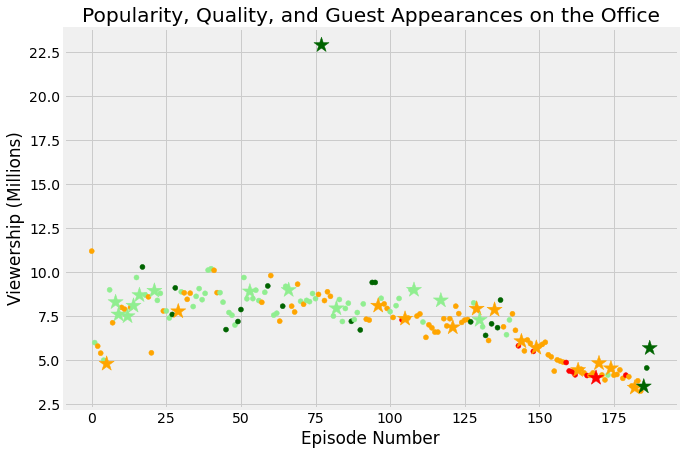

In [7]:
## Initalize a new figure
fig = plt.figure()
plt.style.use('fivethirtyeight')

# Create a scatter plot of epsidoe number versus viewership(in millions)
plt.scatter(x='episode_number', 
            y='viewership_mil', 
            data=non_guest_df,
            c='colors', 
            s='sizes')
plt.scatter(x='episode_number', 
            y='viewership_mil', 
            data=guest_df,
            c='colors', 
            s='sizes',
           marker='*')

# Create a title and axis labels
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")

# Show the plot
plt.show()

Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell").

In [8]:
# The name of one of the guest stars who was in the most watched Office episode
df_most_watched=\
    office_df[office_df['viewership_mil'] == office_df['viewership_mil'].max()]
guest_stars = df_most_watched['guest_stars'].iloc[0]
top_star = guest_stars.split(',')[0]
top_star

'Cloris Leachman'

We can make other exploration.

we can show the most rating episods

In [113]:
most_ratings = office_df[office_df['ratings'] == office_df['ratings'].max()]
most_ratings

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings,colors,sizes
137,137,7,"Goodbye, Michael",As the office gets ready for Michael's final d...,9.8,8059,8.42,50,2011-04-28,NaN,Paul Feig,Greg Daniels,False,1.0,darkgreen,25
187,187,9,Finale,"One year later, Dunder Mifflin employees past ...",9.8,10515,5.69,51,2013-05-16,"Joan Cusack, Ed Begley Jr, Rachel Harris, Nanc...",Ken Kwapis,Greg Daniels,True,1.0,darkgreen,250


We find that the last episode in season 9 one of the most rated episods
Ther writer "Greg Daniels" is the writer of the most 2 rated opisodes.

We create a matplotlib scatter plot of the data that contains the following attributes:

- Each episode's episode number plotted along the x-axis
- Each episode's votes plotted along the y-axis
- A color scheme reflecting the scaled ratings
- A sizing system, episodes with guest appearnces have a marker size 250 and episodes without are sized 25
- A title, reading "votes, Quality, and Guest Appearances on the Office"
- An x-axis label reading "Episode Number"
- A y-axis label reading "Votes"

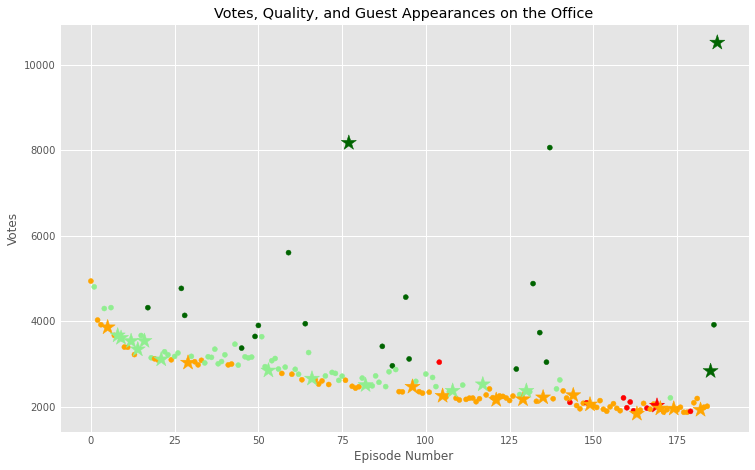

In [138]:
## Initalize a new figure
fig = plt.figure()
plt.style.use('ggplot')


# Create a scatter plot of epsidoe number versus viewership(in millions)
plt.scatter(x='episode_number', 
            y= 'votes', 
            data=non_guest_df,
            c='colors', 
            s='sizes')
plt.scatter(x='episode_number', 
            y='votes', 
            data=guest_df,
            c='colors', 
            s='sizes',
           marker='*')

# Create a title and axis labels
plt.title("Votes, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Votes")

# Show the plot
plt.show()

We find that there is a negative correlation between episods series and votes, but still high rated episods have high votes, even if these episodes are not most popular episodes, but they have most votes.